In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import product
from sklearn.preprocessing import MinMaxScaler

In [49]:
from utils import d_types_methods

In [2]:
scoreboard = pd.read_csv("cv_scoreboard.csv")

In [31]:
# Unique values
targets = scoreboard["target"].unique().tolist()
models = scoreboard["model"].unique().tolist()
features = scoreboard["features"].unique().tolist()

In [36]:
# Consistent color mapping
# for models
palette = sns.color_palette("Set2", len(models))
model_colors = dict(zip(models, palette))

# for features
palette = sns.color_palette("tab10", len(features))
feature_colors = dict(zip(features, palette))

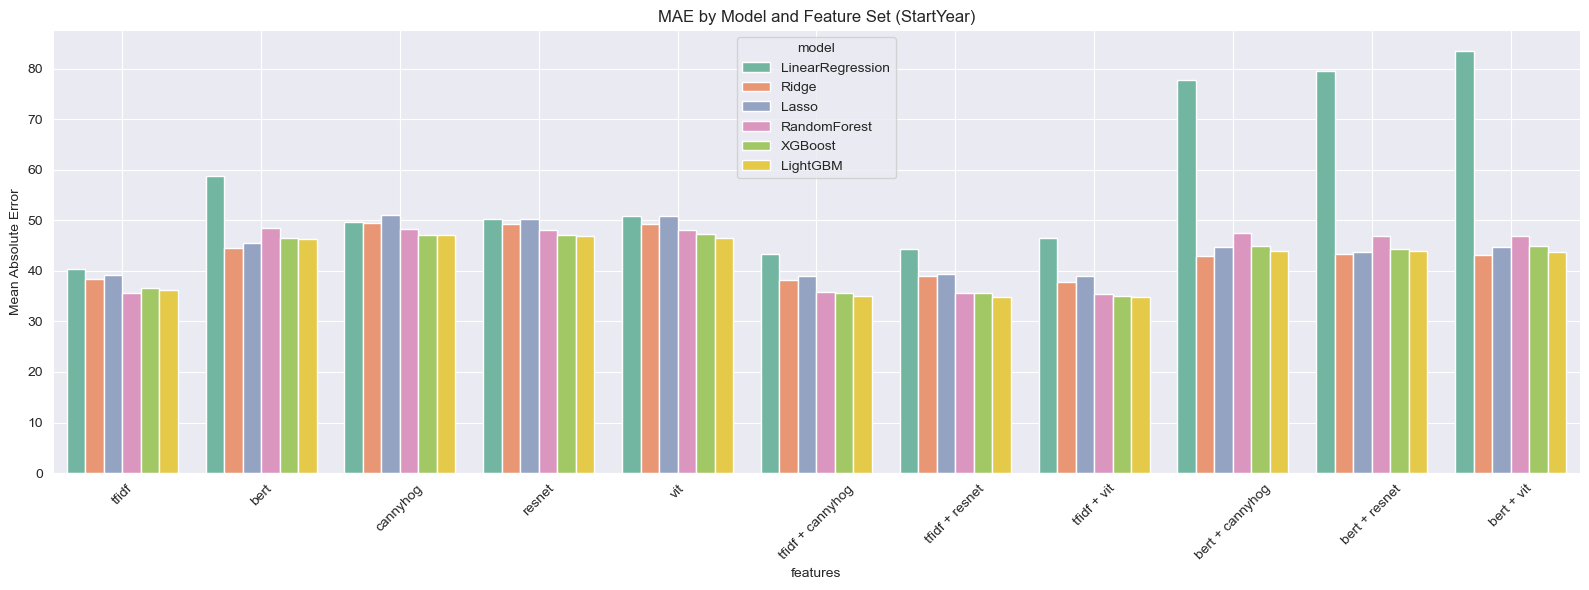

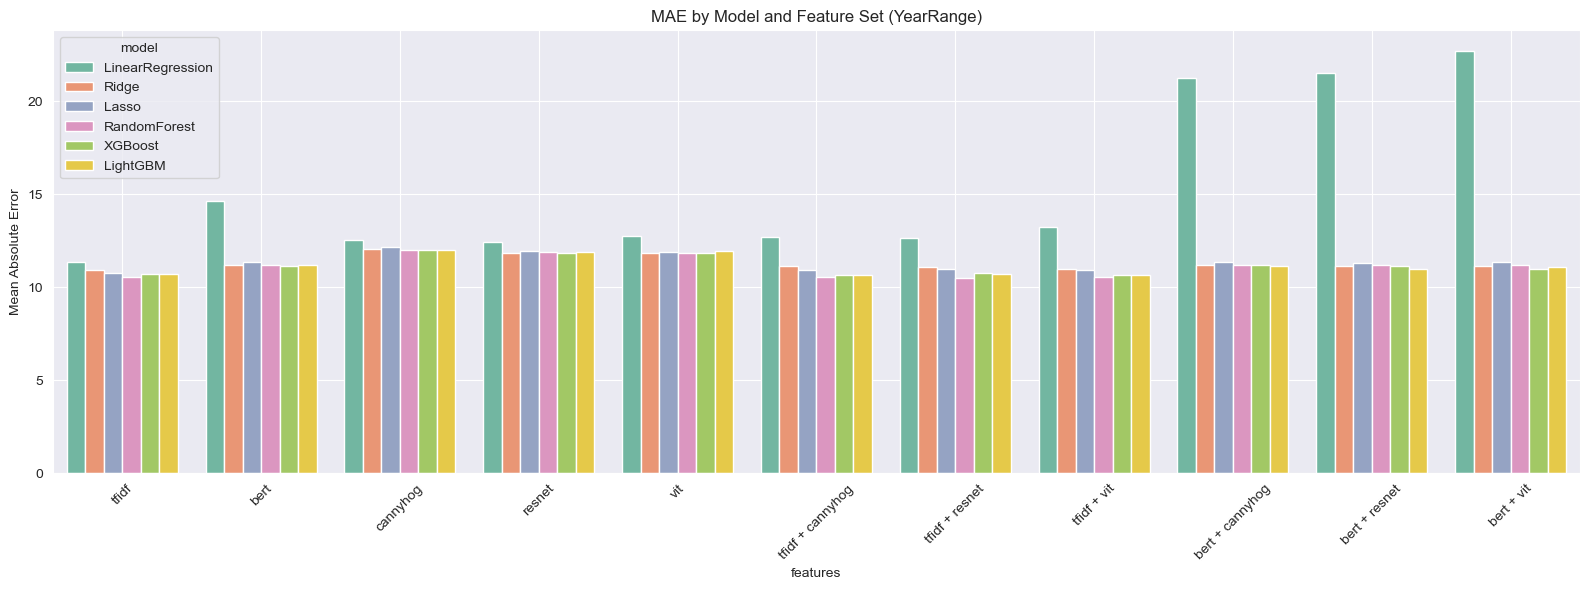

In [39]:
for target in targets:
    subset = scoreboard[scoreboard["target"] == target]

    plt.figure(figsize=(16, 6))
    sns.barplot(
        data=subset,
        x="features",
        y="mae",
        hue="model",
        palette=model_colors
    )

    plt.xticks(rotation=45)
    plt.title(f"MAE by Model and Feature Set ({target})")
    plt.ylabel("Mean Absolute Error")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

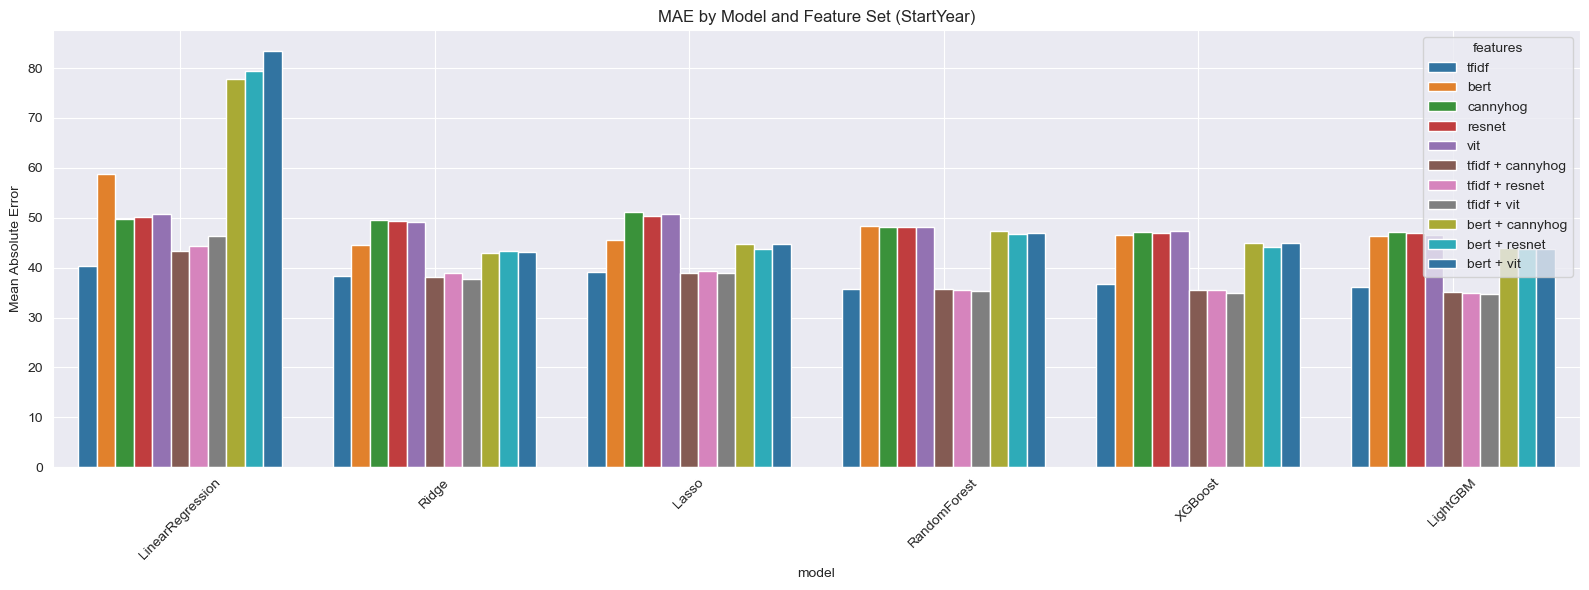

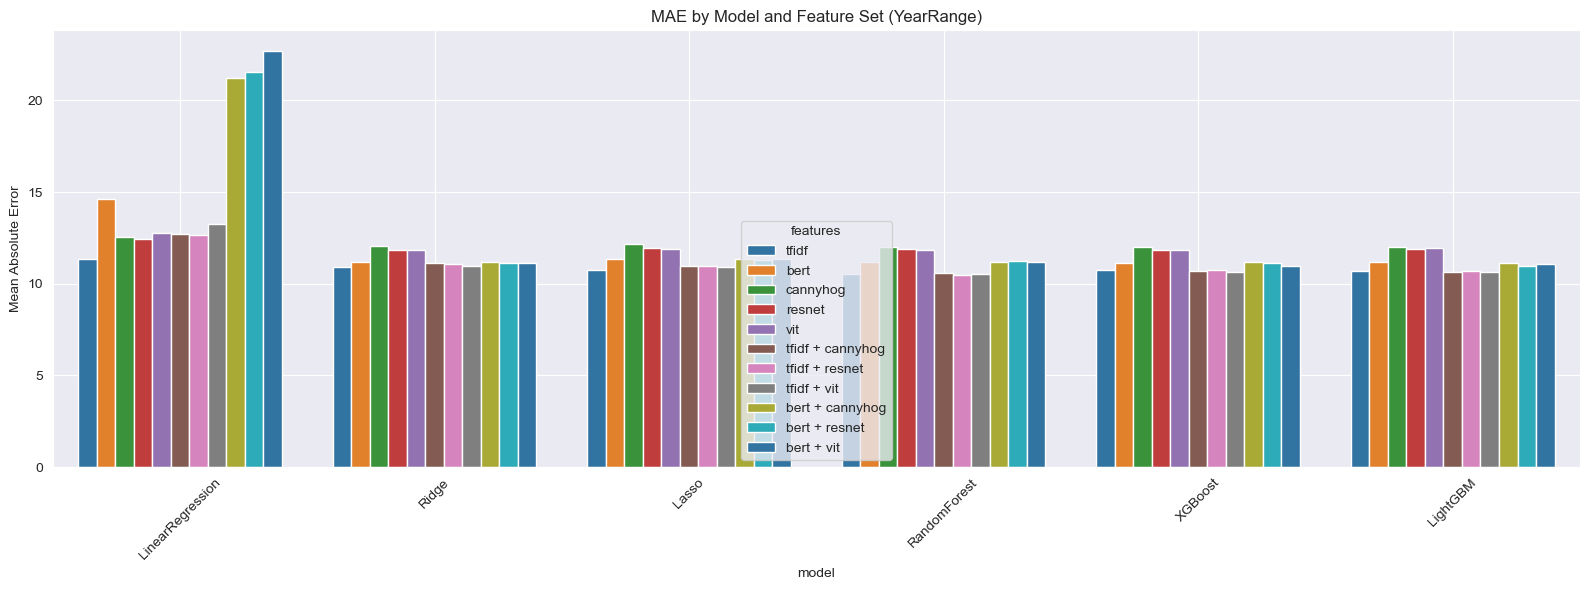

In [40]:
for target in targets:
    subset = scoreboard[scoreboard["target"] == target]

    plt.figure(figsize=(16, 6))
    sns.barplot(
        data=subset,
        x="model",
        y="mae",
        hue="features",
        palette=feature_colors
    )

    plt.xticks(rotation=45)
    plt.title(f"MAE by Model and Feature Set ({target})")
    plt.ylabel("Mean Absolute Error")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

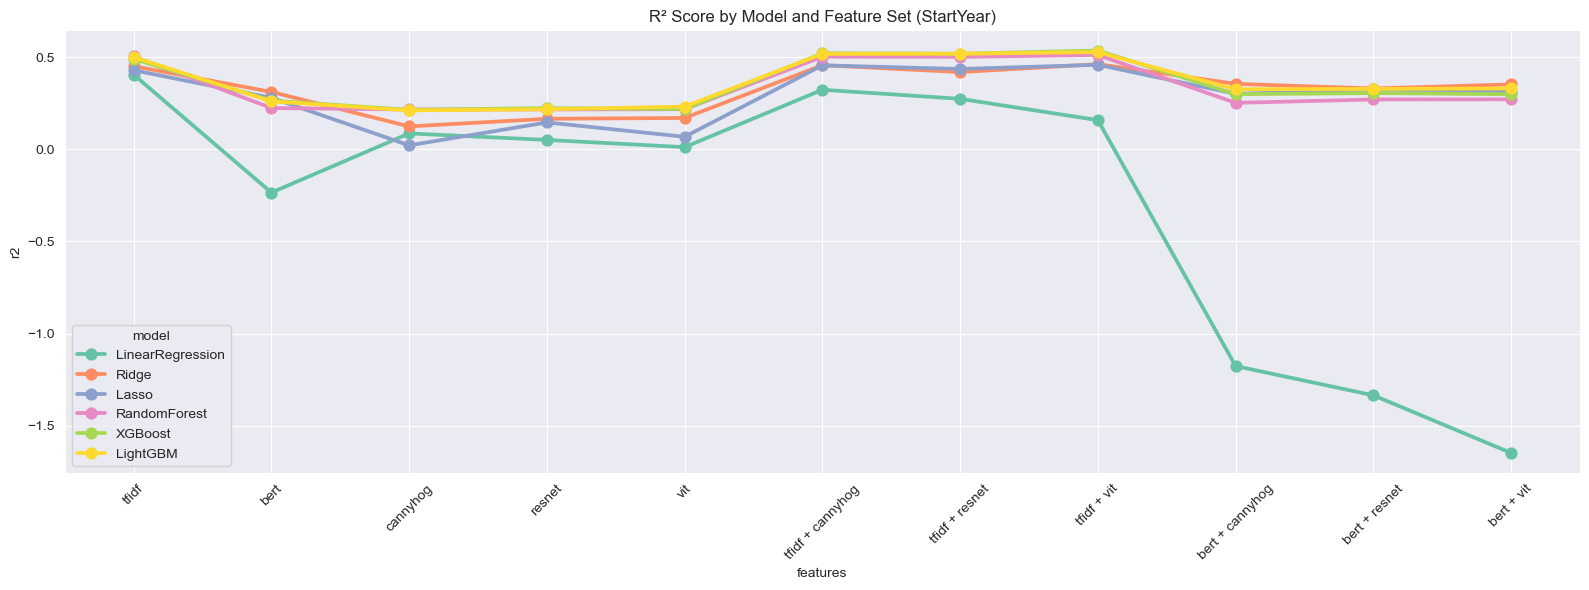

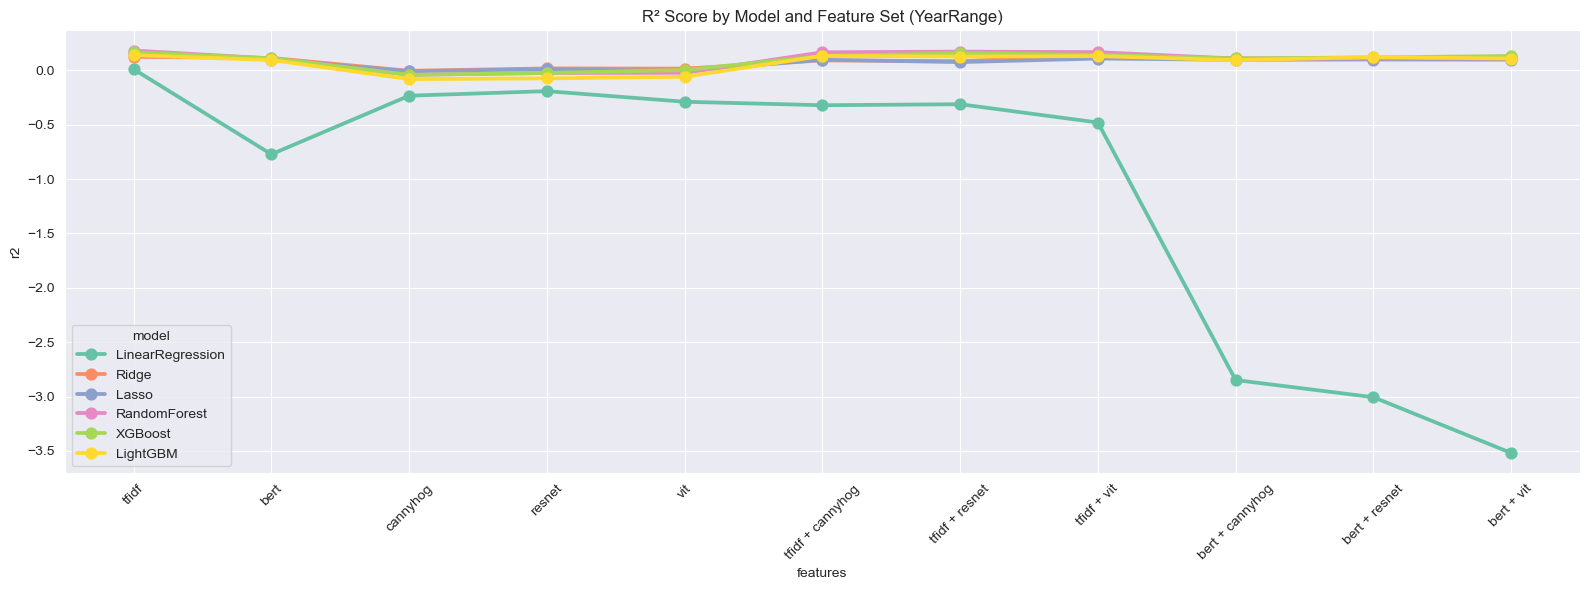

In [41]:
for target in targets:
    plt.figure(figsize=(16, 6))
    sns.pointplot(data=scoreboard[scoreboard['target'] == target], x="features", y="r2", hue="model", palette=model_colors, markers="o")
    plt.xticks(rotation=45)
    plt.title(f"R² Score by Model and Feature Set ({target})")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

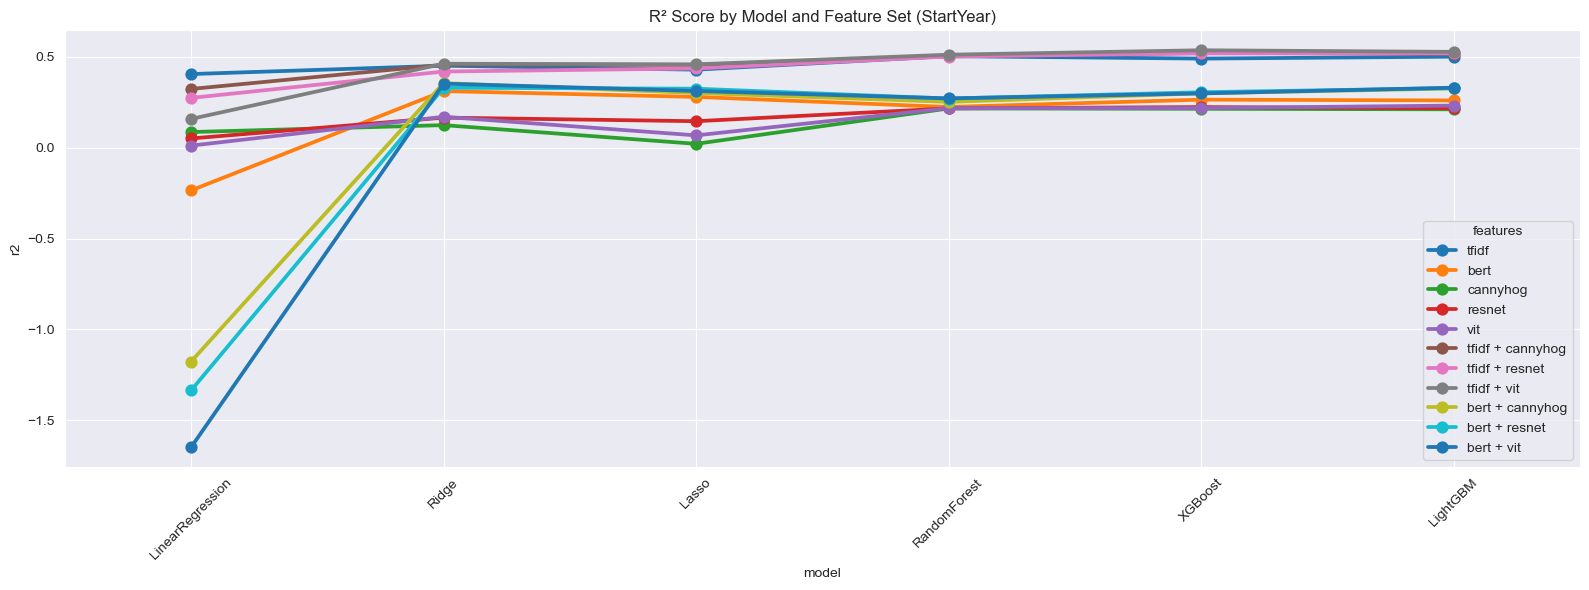

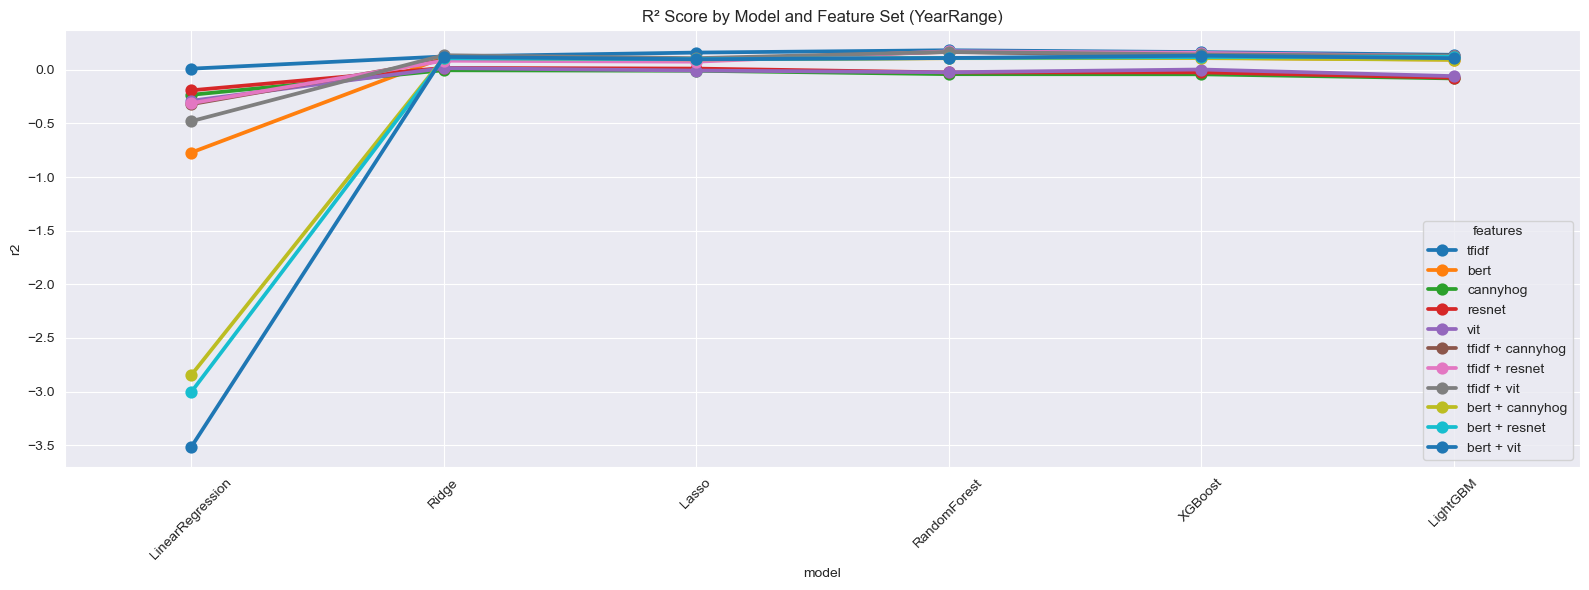

In [42]:
for target in targets:
    plt.figure(figsize=(16, 6))
    sns.pointplot(data=scoreboard[scoreboard['target'] == target], x="model", y="r2", hue="features", palette=feature_colors, markers="o")
    plt.xticks(rotation=45)
    plt.title(f"R² Score by Model and Feature Set ({target})")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

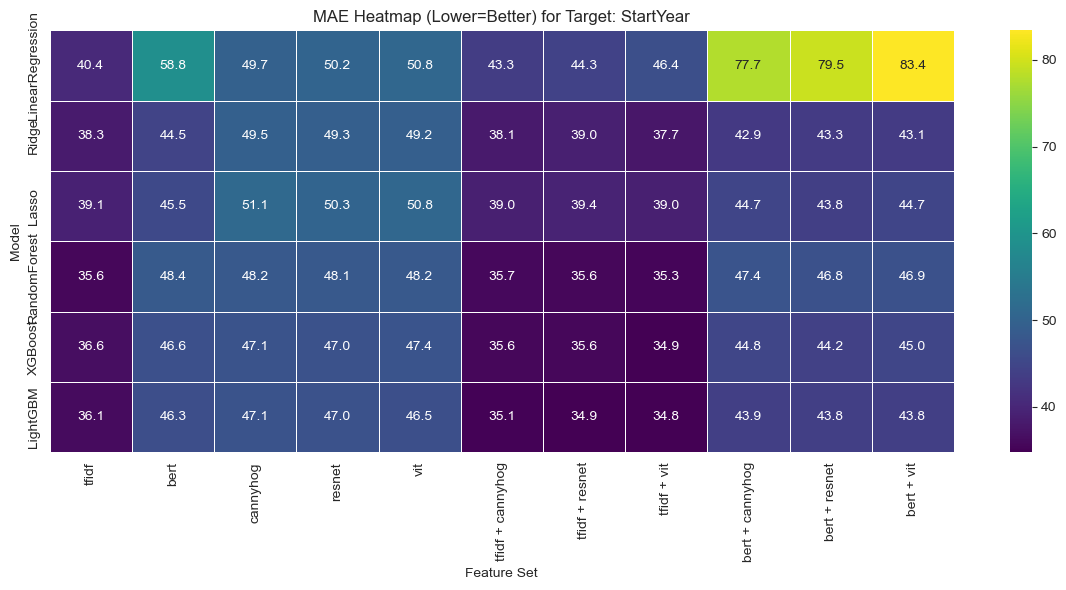

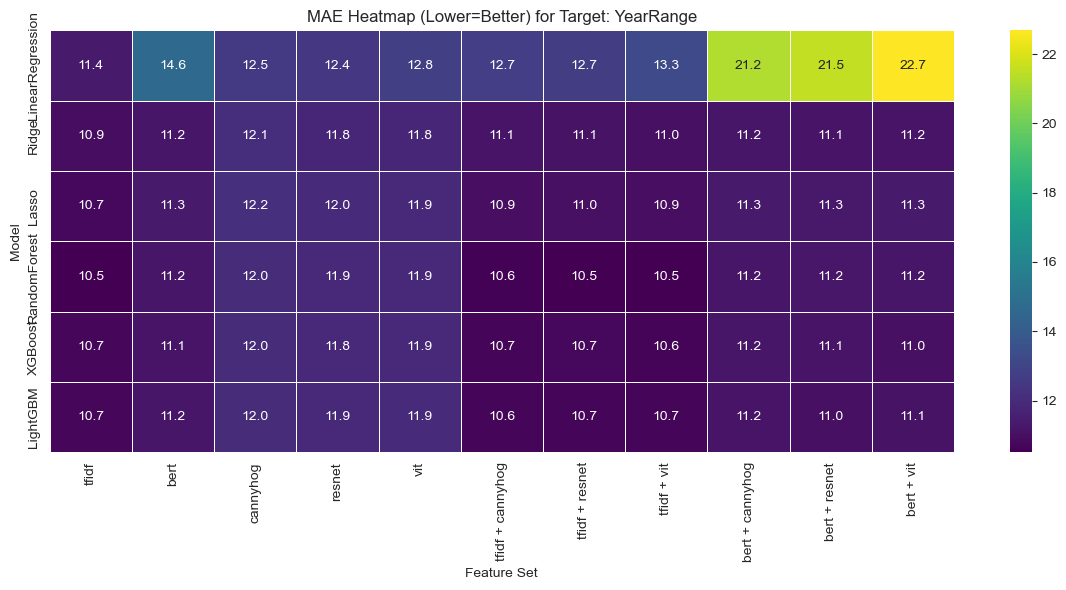

In [45]:
for target in targets:
    subset = scoreboard[scoreboard["target"] == target]
    # Create pivot table with explicit order
    pivot = subset.pivot_table(
        index="model",
        columns="features",
        values="mae"
    ).reindex(index=models, columns=features)

    # Plot
    plt.figure(figsize=(12, 6))
    sns.heatmap(pivot, annot=True, fmt=".1f", cmap="viridis", linewidths=0.5)
    plt.title(f"MAE Heatmap (Lower=Better) for Target: {target}")
    plt.xlabel("Feature Set")
    plt.ylabel("Model")
    plt.tight_layout()
    plt.show()


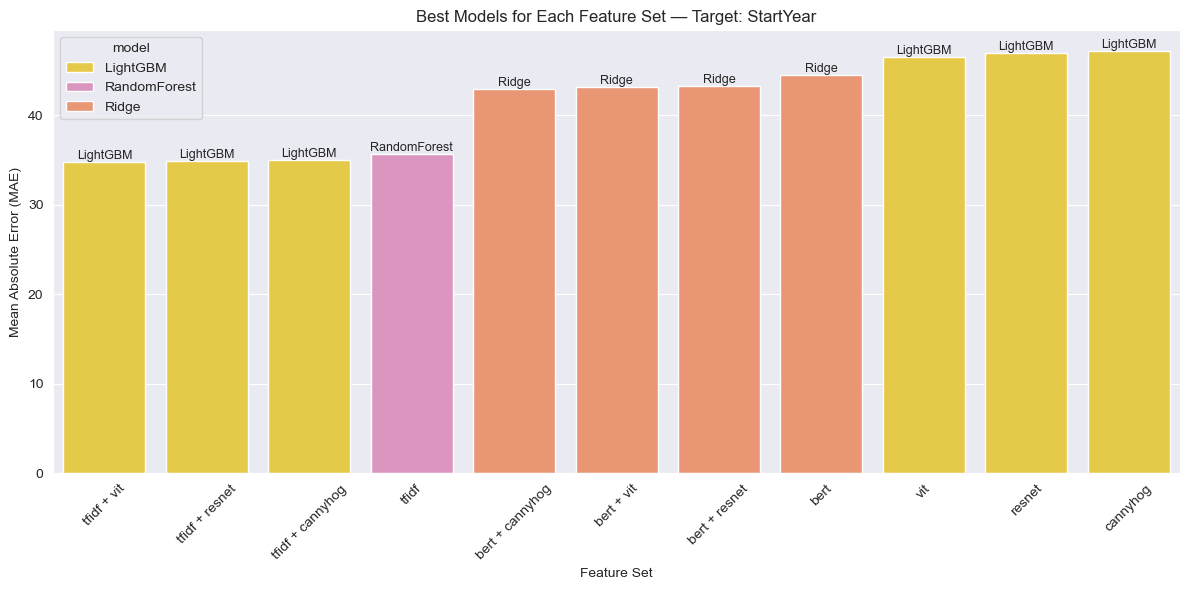

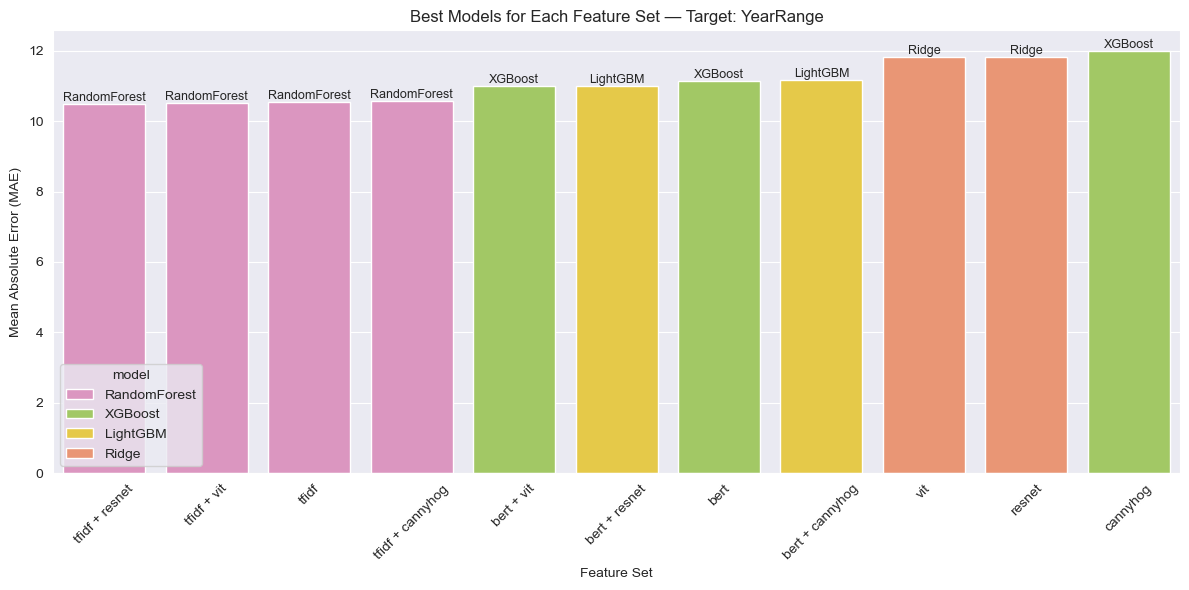

In [46]:
for target in targets:
    subset = scoreboard[scoreboard["target"] == target]
    best_models = subset.loc[subset.groupby("features")["mae"].idxmin()]
    best_models = best_models.sort_values("mae", ascending=True)

    plt.figure(figsize=(12, 6))
    ax = sns.barplot(
        data=best_models,
        x="features",
        y="mae",
        hue="model",
        palette=model_colors
    )

    # Add model name as a label on top of each bar
    for container, label in zip(ax.containers, best_models["model"].unique()):
        ax.bar_label(container, labels=[label]*len(container), fontsize=9, label_type='edge')

    plt.title(f"Best Models for Each Feature Set — Target: {target}")
    plt.ylabel("Mean Absolute Error (MAE)")
    plt.xlabel("Feature Set")
    plt.xticks(rotation=45)
    # plt.legend(title="Model", loc="upper right")
    plt.tight_layout()
    plt.show()

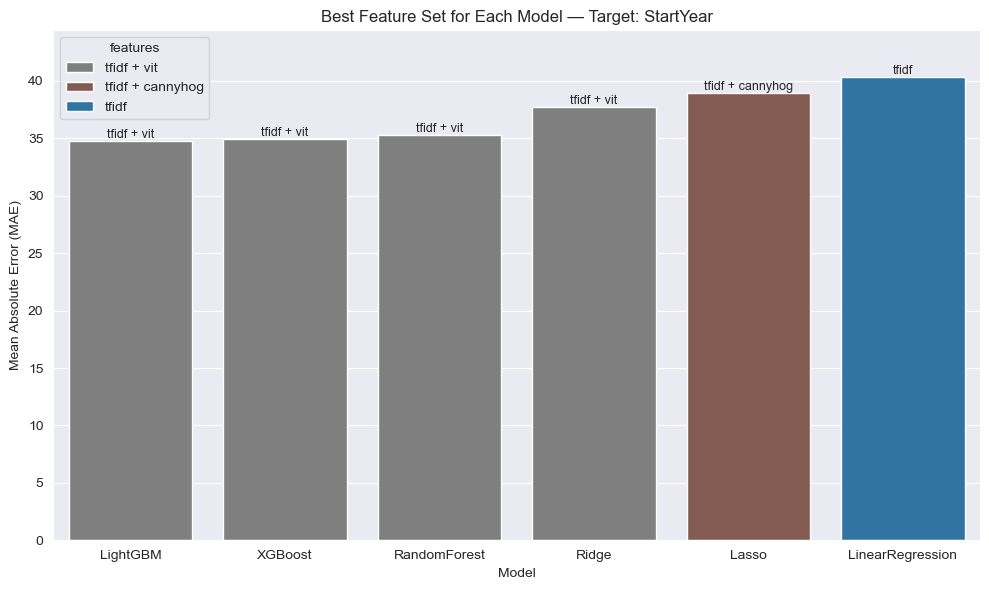

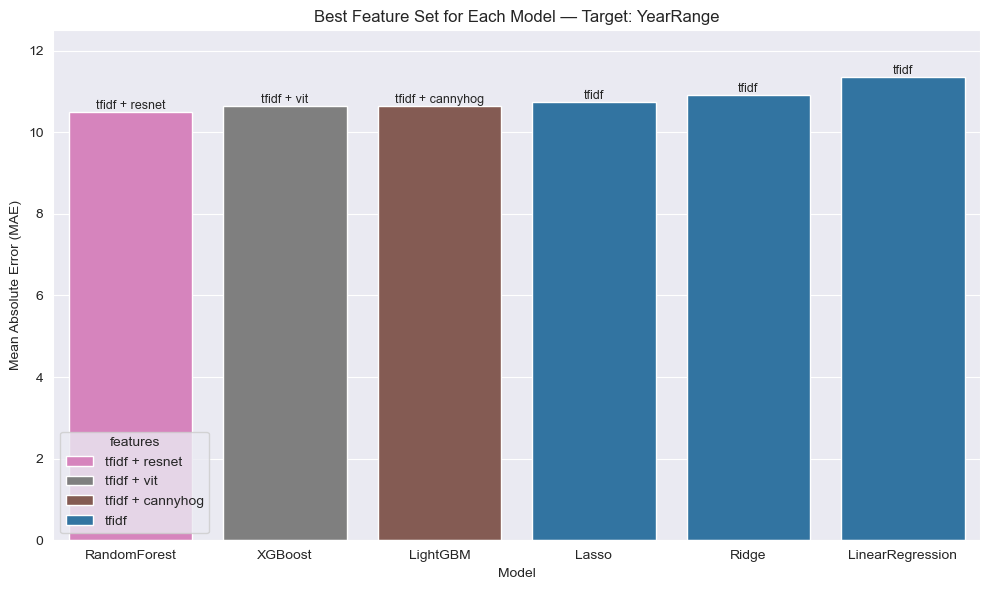

In [47]:
for target in targets:
    subset = scoreboard[scoreboard["target"] == target]

    # Best feature set per model (lowest MAE)
    best_features = subset.loc[subset.groupby("model")["mae"].idxmin()]
    best_features = best_features.sort_values("mae", ascending=True)

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        data=best_features,
        x="model",
        y="mae",
        hue="features",
        palette=feature_colors,
        legend=True
    )

    # Add feature set name on top of each bar
    for bar, feature in zip(ax.patches, best_features["features"]):
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            feature,
            ha='center',
            va='bottom',
            fontsize=9,
            # rotation=45
        )

    plt.title(f"Best Feature Set for Each Model — Target: {target}")
    plt.ylabel("Mean Absolute Error (MAE)")
    plt.xlabel("Model")
    plt.ylim(0, best_features["mae"].max() * 1.1)
    plt.tight_layout()
    plt.show()


In [51]:
d_types_methods["combo"] = tuple(f"{t} + {i}" for t, i in product(d_types_methods["text"], d_types_methods["image"]))

In [54]:
for target in targets:
    for d_type, feature_subset in d_types_methods.items():
        subset = scoreboard.loc[
            (scoreboard["target"] == target) &
            (scoreboard["features"].isin(feature_subset))
        ]
        subset = subset.sort_values("mae", ascending=True)
        print(f"Best Model and Feature Method for {d_type} Data and Target: {target}")
        display(subset.head())

Best Model and Feature Method for text Data and Target: StartYear


,model,target,features,mae,rmse,r2,medae,maxerror:
66,RandomForest,StartYear,tfidf,35.638944,48.499709,0.503665,24.837208,159.632000
110,LightGBM,StartYear,tfidf,36.118458,48.595491,0.500876,25.765730,159.335644
88,XGBoost,StartYear,tfidf,36.645326,49.184585,0.490092,26.536658,163.168390
22,Ridge,StartYear,tfidf,38.298525,51.060963,0.451075,28.276936,169.022406
44,Lasso,StartYear,tfidf,39.137501,52.019653,0.429255,29.758918,181.045084


Best Model and Feature Method for image Data and Target: StartYear


,model,target,features,mae,rmse,r2,medae,maxerror:
114,LightGBM,StartYear,vit,46.517502,60.415199,0.231679,37.370715,175.569021
113,LightGBM,StartYear,resnet,46.951618,60.974454,0.217121,38.114444,180.109839
91,XGBoost,StartYear,resnet,47.044426,60.728596,0.223443,37.425914,179.637848
112,LightGBM,StartYear,cannyhog,47.144048,61.212485,0.211145,38.613920,178.981141
90,XGBoost,StartYear,cannyhog,47.145868,61.117060,0.214035,37.261450,176.731549


Best Model and Feature Method for combo Data and Target: StartYear


,model,target,features,mae,rmse,r2,medae,maxerror:
117,LightGBM,StartYear,tfidf + vit,34.750528,47.279159,0.527294,24.261987,160.269304
116,LightGBM,StartYear,tfidf + resnet,34.885419,47.695827,0.518797,24.544019,157.803232
95,XGBoost,StartYear,tfidf + vit,34.928356,46.930804,0.536000,25.542973,163.926801
115,LightGBM,StartYear,tfidf + cannyhog,35.062550,47.778928,0.517510,24.727134,159.071112
73,RandomForest,StartYear,tfidf + vit,35.334478,48.124284,0.511640,24.505500,155.861000


Best Model and Feature Method for text Data and Target: YearRange


,model,target,features,mae,rmse,r2,medae,maxerror:
77,RandomForest,YearRange,tfidf,10.547472,12.446220,0.181577,10.521375,35.149858
121,LightGBM,YearRange,tfidf,10.718690,12.762477,0.139347,10.277226,37.276357
99,XGBoost,YearRange,tfidf,10.734426,12.575418,0.164527,10.628239,36.396034
55,Lasso,YearRange,tfidf,10.748689,12.610437,0.160056,10.460485,35.796987
33,Ridge,YearRange,tfidf,10.901694,12.882506,0.123620,10.585360,36.802721


Best Model and Feature Method for image Data and Target: YearRange


,model,target,features,mae,rmse,r2,medae,maxerror:
37,Ridge,YearRange,vit,11.815600,13.655486,0.015460,10.328694,35.047234
36,Ridge,YearRange,resnet,11.820241,13.646874,0.017008,10.649481,35.612592
102,XGBoost,YearRange,resnet,11.845007,13.921797,-0.024357,10.437558,36.817512
103,XGBoost,YearRange,vit,11.858262,13.744764,0.002285,10.561107,35.269817
81,RandomForest,YearRange,vit,11.860711,13.913990,-0.023362,10.601295,35.625252


Best Model and Feature Method for combo Data and Target: YearRange


,model,target,features,mae,rmse,r2,medae,maxerror:
83,RandomForest,YearRange,tfidf + resnet,10.500400,12.513428,0.171938,10.232171,36.431540
84,RandomForest,YearRange,tfidf + vit,10.523155,12.553833,0.166634,10.229546,35.805769
82,RandomForest,YearRange,tfidf + cannyhog,10.562491,12.562583,0.165386,10.375007,35.965054
106,XGBoost,YearRange,tfidf + vit,10.631821,12.735733,0.142300,9.862779,36.903174
126,LightGBM,YearRange,tfidf + cannyhog,10.649098,12.811074,0.132400,9.967715,37.908965


In [61]:
# Define data types based on features
def get_data_type(features):
    if "+" in features:
        return "combo"
    elif features in ["tfidf", "bert"]:
        return "text"
    else:
        return "image"

scoreboard["data_type"] = scoreboard["features"].apply(get_data_type)

# Normalize metrics (all except model, target, features)
metric_cols = ["mae", "rmse", "r2", "medae", "maxerror:"]
# For metrics where lower is better, we invert them after scaling to match higher = better
scoreboard_scaled = scoreboard.copy()
scaler = MinMaxScaler()

for target in scoreboard["target"].unique():
    mask = scoreboard["target"] == target
    subset = scoreboard.loc[mask, metric_cols]

    # Normalize each metric separately
    scaled = scaler.fit_transform(subset)

    df_scaled = pd.DataFrame(scaled, columns=metric_cols, index=subset.index)

    # Invert the metrics where lower is better (so that higher is better for all)
    for col in ["mae", "rmse", "medae", "maxerror:"]:
        df_scaled[col] = 1 - df_scaled[col]

    # Combine metrics into a single score (e.g., average or weighted sum)
    scoreboard_scaled.loc[mask, "composite_score"] = df_scaled.mean(axis=1)

# Find the best row per target and data_type
best_choices = scoreboard_scaled.sort_values("composite_score", ascending=False).groupby(["target", "data_type"]).head(1)

# Clean up
best_choices = best_choices[["target", "data_type", "model", "features", "composite_score"] + metric_cols]
best_choices = best_choices.sort_values(["target", "data_type"])
# View or export
display(best_choices)

,target,data_type,model,features,composite_score,mae,rmse,r2,medae,maxerror:
117,StartYear,combo,LightGBM,tfidf + vit,0.993975,34.750528,47.279159,0.527294,24.261987,160.269304
114,StartYear,image,LightGBM,vit,0.801657,46.517502,60.415199,0.231679,37.370715,175.569021
66,StartYear,text,RandomForest,tfidf,0.982027,35.638944,48.499709,0.503665,24.837208,159.632000
84,YearRange,combo,RandomForest,tfidf + vit,0.984817,10.523155,12.553833,0.166634,10.229546,35.805769
59,YearRange,image,Lasso,vit,0.943552,11.870406,13.811789,-0.007568,10.093364,35.074017
77,YearRange,text,RandomForest,tfidf,0.981858,10.547472,12.446220,0.181577,10.521375,35.149858


In [62]:
best_choices.to_csv("best_models.csv", index=False)